## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [5]:
df.shape

(1340, 10)

In [6]:
pd.set_option("display.float_format","{:.2f}".format)

In [7]:
sns.set(style="whitegrid",palette="Set2", font_scale=1.1)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.shape

(1332, 10)

In [12]:
df.isna().sum().sum()

np.int64(0)

In [13]:
df.describe(include="all")

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


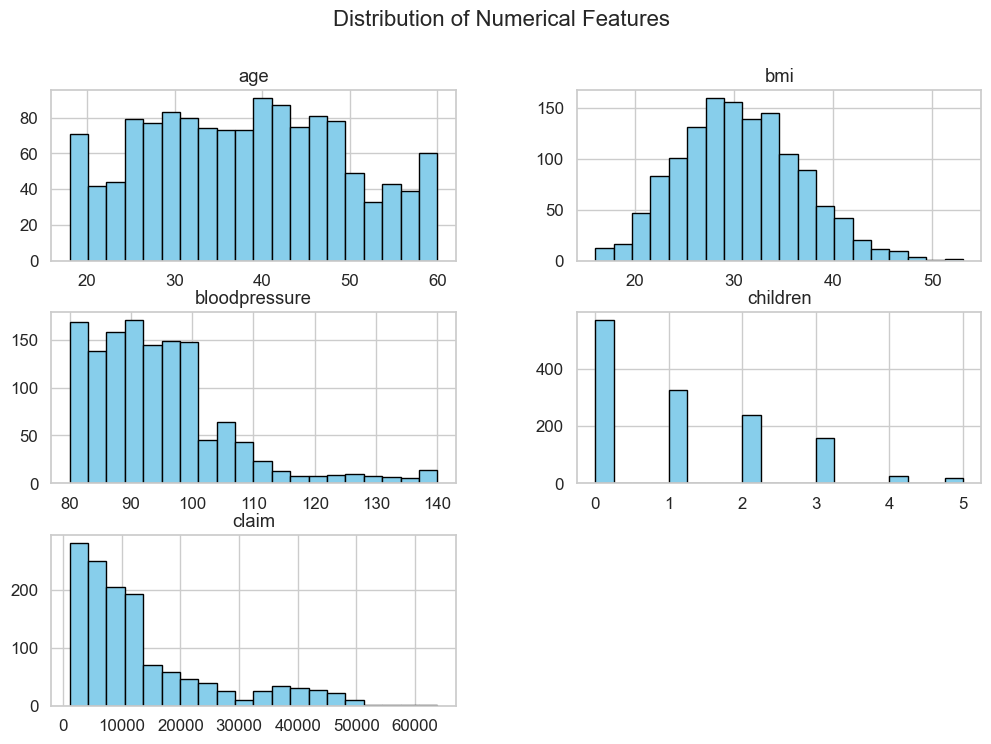

In [14]:
numeric_cols = ["age","bmi","bloodpressure","children","claim"]
df[numeric_cols].hist(bins=20,figsize=(12,8),color="skyblue",edgecolor="black")
plt.suptitle("Distribution of Numerical Features",fontsize=16)
plt.show()

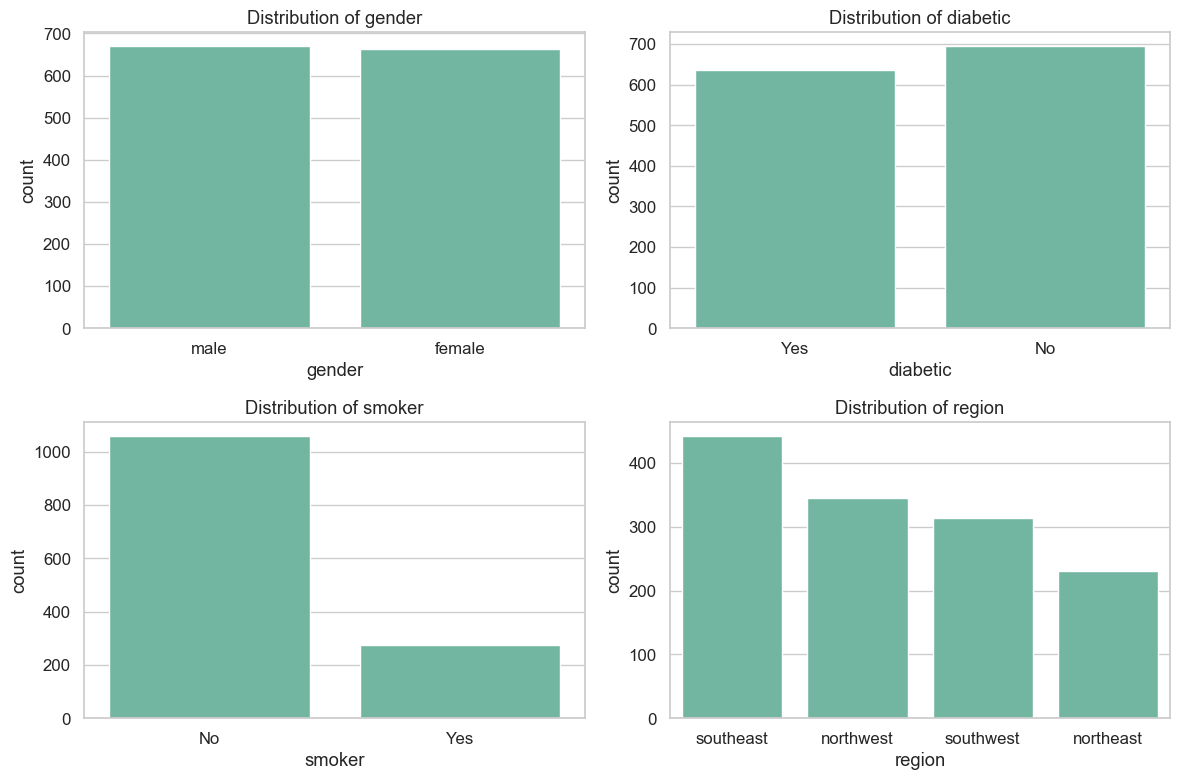

In [15]:
cat_cols=["gender","diabetic","smoker","region"]
plt.figure(figsize=(12,8))
for i, col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.countplot(data = df, x = col)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()    

In [16]:
df.groupby(["gender","smoker"])["claim"].mean(),round(2)

(gender  smoker
 female  No        8762.30
         Yes      30679.00
 male    No        8169.25
         Yes      33042.01
 Name: claim, dtype: float64,
 2)

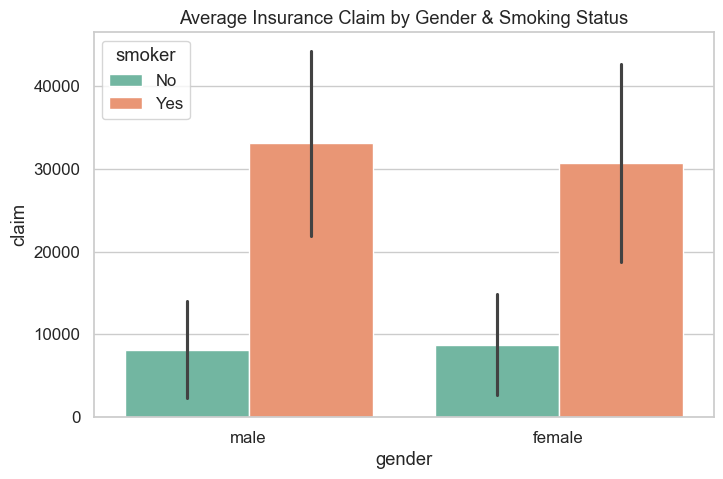

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data = df,x="gender", y="claim", hue="smoker",estimator="mean",errorbar="sd")
plt.title("Average Insurance Claim by Gender & Smoking Status")
plt.show()

In [18]:
pivot_region_diabetic = df.groupby(["region","diabetic"])["claim"].mean().unstack()

In [19]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


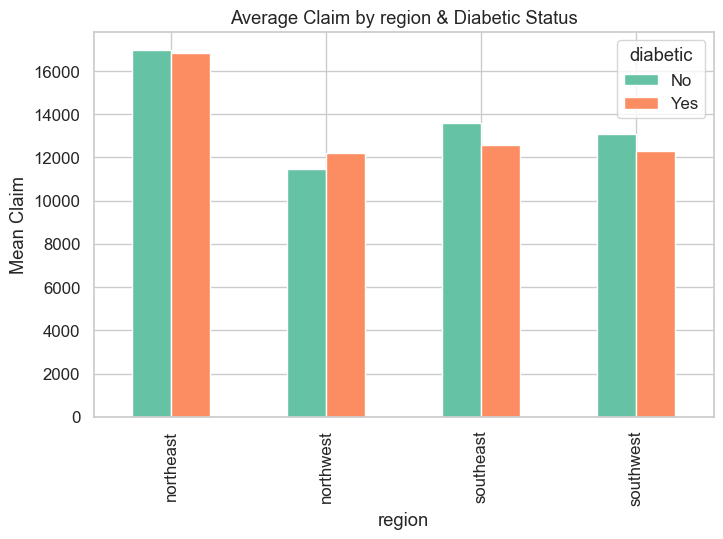

In [20]:
pivot_region_diabetic.plot(kind = "bar",figsize = (8,5))
plt.title("Average Claim by region & Diabetic Status")
plt.ylabel("Mean Claim")
plt.show()

In [21]:
pivot_table=pd.pivot_table(df,values="claim", index = "region",columns = "smoker",aggfunc="mean")
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [22]:
pivot_table=pd.pivot_table(df, values="claim",index="children", columns="diabetic",aggfunc="mean")
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [23]:
numeric_cols

['age', 'bmi', 'bloodpressure', 'children', 'claim']

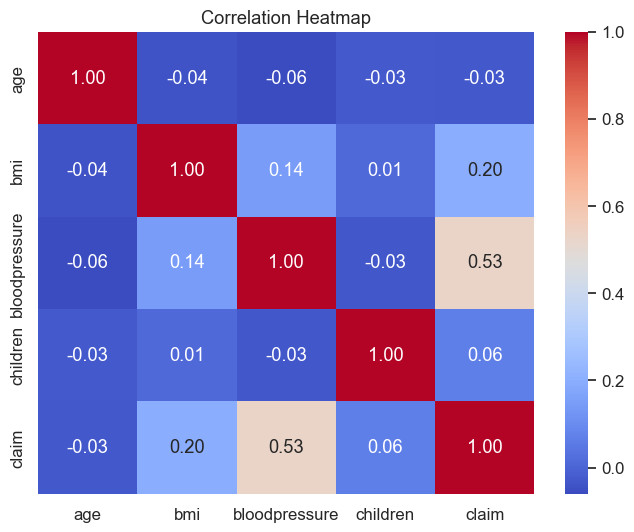

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

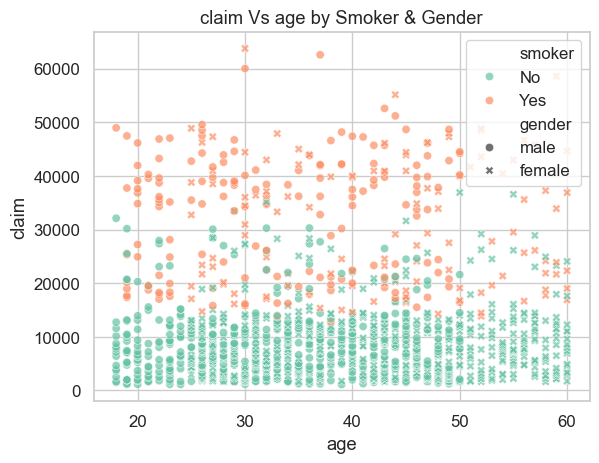

In [25]:
sns.scatterplot(data = df, x = "age", y = "claim", hue = "smoker", style = "gender", alpha = 0.7)
plt.title("claim Vs age by Smoker & Gender")
plt.show()

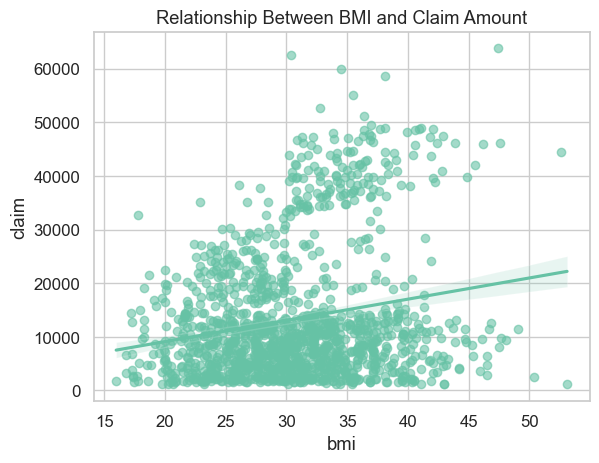

In [26]:
sns.regplot(data = df, x = "bmi", y="claim", scatter_kws={"alpha":0.6})
plt.title("Relationship Between BMI and Claim Amount")
plt.show()

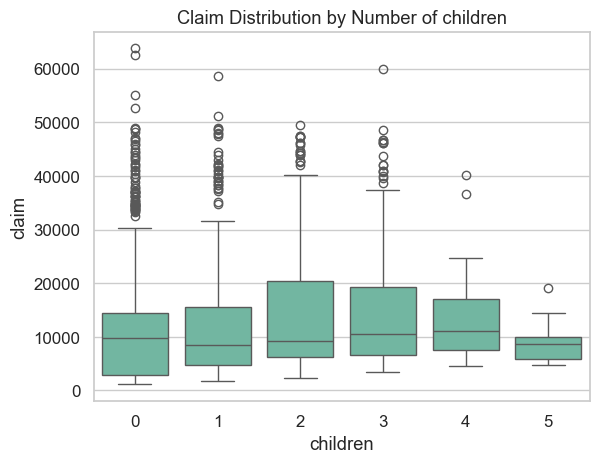

In [27]:
sns.boxplot(data = df, x="children",y="claim")
plt.title("Claim Distribution by Number of children")
plt.show()

In [28]:
df["age_group"]= pd.cut(df["age"],bins = [0,18,30,45,60,100], labels=["<18","18-30","32-45","46-60","60+"])
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,32-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,18-30
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,32-45
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,46-60
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,18-30
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,32-45


In [29]:
df["age_group"].value_counts()


age_group
32-45    553
46-60    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

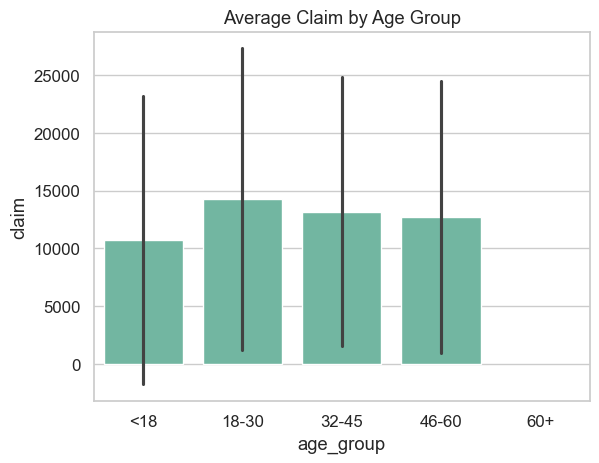

In [30]:
sns.barplot(data = df, x="age_group",y="claim", estimator= "mean", errorbar="sd")
plt.title("Average Claim by Age Group")
plt.show()

In [31]:
df["bmi_category"]=pd.cut(df["bmi"], bins = [0, 18.5,24.9, 29.9, 100], labels=["Underweight","Normal","Overweight","Obesse"])

In [32]:
df["bmi_category"].value_counts()

bmi_category
Obesse         702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

In [33]:
import warnings
warnings.filterwarnings("ignore")

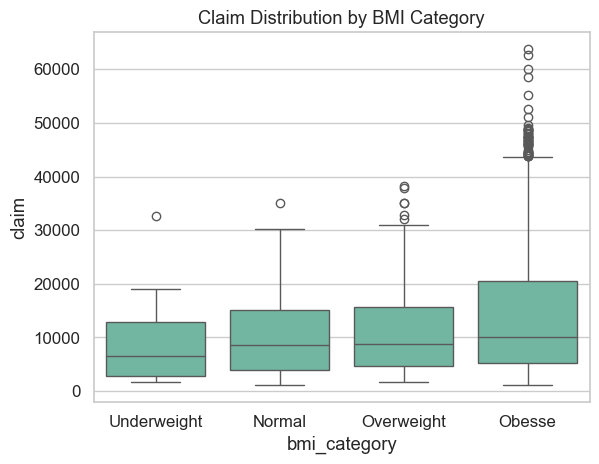

In [34]:
sns.boxplot(data=df,x="bmi_category", y="claim")
plt.title("Claim Distribution by BMI Category")
plt.show()

### Feature Engineering

In [35]:
#Feature Engineering
region_stats=df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x: (x=="Yes").mean()*100),
    mean_claim = ("claim","mean")
).reset_index()

In [36]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


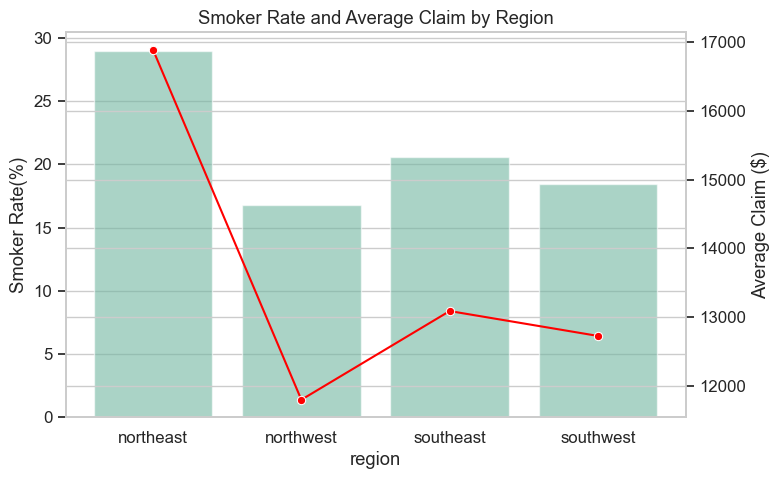

In [37]:
fig, ax1 = plt.subplots(figsize=(8,5))
sns.barplot(data = region_stats, x="region", y="smoker_rate",ax= ax1, alpha = 0.6)
ax2 = ax1.twinx()
sns.lineplot(data = region_stats, x="region", y="mean_claim",ax = ax2, color ="red", marker ="o")
ax1.set_ylabel("Smoker Rate(%)")
ax2.set_ylabel("Average Claim ($)")
plt.title("Smoker Rate and Average Claim by Region")
plt.show()

### Data Preparation

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import joblib

In [39]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [40]:
X = df[["age","gender","bmi","bloodpressure","diabetic","children","smoker"]]
y = df["claim"]

In [41]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,male,23.20,91,Yes,0,No
1,24.00,male,30.10,87,No,0,No
7,19.00,male,41.10,100,No,0,No
8,20.00,male,43.00,86,No,0,No
9,30.00,male,53.10,97,No,0,No
...,...,...,...,...,...,...,...
1335,44.00,female,35.50,88,Yes,0,Yes
1336,59.00,female,38.10,120,No,1,Yes
1337,30.00,male,34.50,91,Yes,3,Yes
1338,37.00,male,30.40,106,No,0,Yes


In [42]:
cat_cols=["gender","diabetic","smoker"]
label_encoders = {}

In [43]:
for col in cat_cols:
    le = LabelEncoder()
    X[col]=le.fit_transform(X[col])
    label_encoders[col] = le

    joblib.dump(le, f"label_encoder_{col}.pkl")

In [44]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [45]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
num_cols = ["age","bmi","bloodpressure","children"]
scaler = StandardScaler()

In [48]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [49]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [50]:
print(X_train.shape, y_train.shape)

(1065, 7) (1065,)


In [51]:
print(X_test.shape, y_test.shape)

(267, 7) (267,)


In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [53]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {"R2" : r2, "MAE" : mae, "RMSE" : rmse}

In [54]:
results = {}

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)
results["Linear Regression"] = evaluate_model(lr, X_train, X_test, y_train, y_test)
print("Linear Regression model trained")

best_poly_model= None
best_poly_score = -np.inf

for degree in [2,3]:
    poly = PolynomialFeatures(degree= degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly, y_train)

    score = poly_lr.score(X_test_poly, y_test)

    if score > best_poly_score:

        best_poly_score=score
        best_poly_model = (degree, poly, poly_lr)

degree, poly, poly_lr = best_poly_model

results[f"Polynomial Regression (deg = {degree})"] = evaluate_model(poly_lr, poly.fit_transform(X_train), poly.transform(X_test), y_train, y_test)

print("Polynomial Regression models are trainde")

rf = RandomForestRegressor()

rf_params = {
    "n_estimators": [100,200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2,5],
    "min_samples_leaf": [1,2]
}

rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring = "r2", n_jobs = -1, verbose =0)
rf_grid.fit(X_train,y_train)
best_rf = rf_grid.best_estimator_

results["Random Forest"] = evaluate_model(best_rf, X_train, X_test, y_train, y_test)

print("Random Forest training is completed, best parameters:", rf_grid.best_params_)

svr=SVR()

svr_params = {
    "kernel" : ["rbf","poly","linear"],
    "C": [1,10,50],
    "epsilon": [0.1,0.2,0.3],
    "degree":[2,3]

}
svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring ="r2", n_jobs= -1, verbose=0)
svr_grid.fit(X_train, y_train)

best_svr = svr_grid.best_estimator_
results["SVR"] = evaluate_model(best_svr, X_train, X_test, y_train, y_test)

print("SVR training is completed, best parameters:", svr_grid.best_params_)

xgb= XGBRegressor(Objective="reg:Squarederror")

xgb_params = {
    "n_estimators": [100,200],
    "max_depth": [3,5,7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8,1.0]

}
xgb_grid = GridSearchCV(xgb, xgb_params, cv = 3, scoring ="r2",n_jobs = -1, verbose=0)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

results["XGBoost"]=evaluate_model(best_xgb, X_train, X_test, y_train, y_test)

print("XGBoost training is completed, best parameters:", xgb_grid.best_params_)


Linear Regression model trained
Polynomial Regression models are trainde
Random Forest training is completed, best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
SVR training is completed, best parameters: {'C': 50, 'degree': 2, 'epsilon': 0.3, 'kernel': 'linear'}
XGBoost training is completed, best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [56]:
results

{'Linear Regression': {'R2': 0.6522210518676395,
  'MAE': 5108.00951003709,
  'RMSE': np.float64(6538.75149372079)},
 'Polynomial Regression (deg = 3)': {'R2': 0.7378256879053664,
  'MAE': 4361.62117889756,
  'RMSE': np.float64(5677.253098672734)},
 'Random Forest': {'R2': 0.76621825064798,
  'MAE': 4115.104815506602,
  'RMSE': np.float64(5361.033110223172)},
 'SVR': {'R2': 0.5135564880973067,
  'MAE': 5466.311772977359,
  'RMSE': np.float64(7733.202720517559)},
 'XGBoost': {'R2': 0.7883860941158728,
  'MAE': 3953.2432972700144,
  'RMSE': np.float64(5100.529797696884)}}

In [57]:
results_df = pd.DataFrame(results).T.sort_values(by = "R2", ascending = False)
results_df

,R2,MAE,RMSE
XGBoost,0.79,3953.24,5100.53
Random Forest,0.77,4115.10,5361.03
Polynomial Regression (deg = 3),0.74,4361.62,5677.25
Linear Regression,0.65,5108.01,6538.75
SVR,0.51,5466.31,7733.20


In [58]:
models={
    "Linear Regression":lr,
    "Polynomial Regression": poly_lr,
    "Random Forest": best_rf,
    "SVR": best_svr,
    "XGBoost": best_xgb
}

In [59]:
best_r2 = results_df["R2"].max()

In [60]:
best_r2

np.float64(0.7883860941158728)

In [61]:
top_model=results_df[results_df["R2"]== best_r2]


In [62]:
top_model

,R2,MAE,RMSE
XGBoost,0.79,3953.24,5100.53


In [63]:
best_model=models[top_model.index[0]]

In [64]:
best_model

XGBRegressor(Objective='reg:Squarederror', base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, ...)

In [65]:
joblib.dump(best_model, "best_model.pkl")
print(f"Bes model selected:{top_model.index[0]}")

Bes model selected:XGBoost
